### Exercise 4:
In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. 
- Create a pandas dataframe, df_iris, from this data.

In [ ]:
import pandas as pd
from acquire import get_iris_data

In [ ]:
#renaming the db
df_iris = get_iris_data()
df_iris.head()

In [ ]:
#Print the first 3 rows:
df_iris.head(3)

In [ ]:
#print the number of rows and columns (shape)
df_iris.shape

In [ ]:
#print the column names
df_iris.columns

In [ ]:
#print the data type of each column
df_iris.dtypes

In [ ]:
#print the summary statistics for each of the numeric variables
df_iris_t= df_iris.describe().T

In [ ]:
df_iris_t= df_iris['range'] = df_iris['max'] - df_iris['min']
df_iris

### Exercise 5:
Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

Make sure that the spreadsheet is publicly visible under your sharing settings.

In [ ]:
from acquire import google_sheets

In [ ]:
df_google_sheets=google_sheets()

In [ ]:
df_google_sheets

In [ ]:
#assign the first 100 rows to a new dataframe, df_google_sheets_sample
df_google_sheets_sample = df_google_sheets.head(100)
df_google_sheets_sample

In [ ]:
#print the number of rows of your original dataframe
df_google_sheets.shape

In [ ]:
#print the first 5 column names
df_google_sheets.iloc[:0,:5]

In [ ]:
#OR....
df_google_sheets.columns[:5] #slicing data with the []

In [ ]:
#print the column names that have a data type of object
df_google_sheets.dtypes[df_google_sheets.dtypes == "object"].index.values

In [ ]:
#OR..
df_google_sheets.select_dtypes(include='object').describe()

In [ ]:
df_google_sheets.select_dtypes(include='object').columns.tolist()

In [ ]:
#compute the range for each of the numeric variables.
float=df_google_sheets.dtypes[df_google_sheets.dtypes == "float"].index.values

float

In [ ]:
monthly_range = df_google_sheets.monthly_charges.max()-df_google_sheets.monthly_charges.min()
total_range = df_google_sheets.total_charges.max()-df_google_sheets.total_charges.min()
tenure_range = df_google_sheets.tenure.max()-df_google_sheets.tenure.min()

monthly_range,total_range,tenure_range

In [ ]:
### Another way of doing this:
df_google_sheets.describe()

In [ ]:
df_google_sheets.describe().loc[['min','max']] 

In [ ]:
df_google_sheets.describe().T

In [ ]:
df_google_sheets[['max','min']].describe().T

In [ ]:
df=df_google_sheets['range']= df_google_sheets['max'] - df_google_sheets['min']

### Exercise 6:

Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.

In [ ]:
#when acquiring data (using the acquire.py, remember to import either wholesale of the file OR use the FROM acquire import____df wantied)
from acquire import excel_file
df_excel = excel_file()
df_excel.head()

In [ ]:
#assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample=df_excel.head(100)
df_excel_sample

In [ ]:
#print the number of rows of your original dataframe
df_excel.shape

In [ ]:
#print the first 5 column names
df_excel.columns[:5]

In [ ]:
#print the column names that have a data type of object
df_excel.columns.select_dtypes[include =='object']

### Acquire.py Functions

#### Exercise One of acquire.py functions:

In [ ]:
import acquire

In [ ]:
titanic_df = acquire.get_titanic_data() ## need to add the data/functions to acquire
titanic_df.head()

#### Exercise Two of acquire.py function

### Prepare Exercises

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

<b>Using the Iris Data:</b>

- Use the function defined in acquire.py to load the iris data. ✅ 

- Drop the species_id and measurement_id columns. ✅ 

- Rename the species_name column to just species. ✅ 

- Create dummy variables of the species name. ✅ 

- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied. ✅ 

In [ ]:
import acquire
import pandas as pd
df = acquire.get_iris_data()
df.head()

#Drop duplicates
df.drop_duplicates(inplace=True)
df

#### Takeaways: Next for Cleaning
- Drop the Unnamed, species_id and measurement_id columns
- Rename the species_name column to just 'species'

In [ ]:
#drop the columns
columns_to_drop = ['species_id']
#rename df so it does not interfere with og df
sepal_data = df.drop(columns=columns_to_drop) 
sepal_data

In [ ]:
sepal_data.rename(columns = {'species_name':'species'}, inplace = True)
sepal_data

#### Takeaways, and next steps:
- Create dummy variables of the species name.

- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
#create dummy variables of the species name
dummy_df = pd.get_dummies(sepal_data[['species']], dummy_na=False, drop_first=[True])
dummy_df

In [ ]:
# Concatenate my dummy_df to my data
sepal_data1= pd.concat([sepal_data, dummy_df], axis=1)
sepal_data1

In [ ]:
df = acquire.get_iris_data()
clean_df= prep_iris(df)
clean_df

#### Using the Titanic Dataset

Use the function defined in acquire.py to load the Titanic data.

- Drop any unnecessary, unhelpful, or duplicated columns.

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

- Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [ ]:
from acquire import new_titanic_data
df = new_titanic_data()

#Drop duplicates
df.drop_duplicates(inplace=True)
df

###Takeaways: 
- Drop columns class, embarked and passenger_id
- Drop deck: not needed/too many NaNs

In [ ]:
#Drop columns
columns_to_drop=['embarked', 'class', 'passenger_id', 'deck']

In [ ]:
data = df.drop(columns=columns_to_drop) #saved as a new variable so as not to mess up original data
data

#Encoding: Turning categorical columns into Boolean
- sex, embark_town (so both are easier to pull data)
    -we concat to the add to our data df

In [ ]:
dummy_df = pd.get_dummies(data[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
data= pd.concat([data, dummy_df], axis=1)
data

In [ ]:
#Create a function named prep_titanic that accepts the raw titanic data, 
#and returns the data with the transformations above applied.
def clean_titanic_data(data):
    '''
    Takes in a titanic dataframe and returns a clean dataframe
    Arguments: df - a pandas dataframe with the expected feature names and columns
    Return: clean_df - a dataframe with the cleaning operations performed on it
    '''
    #Drop duplicates
    df.drop_duplicates(inplace=True)
    #Drop columns
    columns_to_drop=['embarked', 'class', 'passenger_id', 'deck']
    data = df.drop(columns=columns_to_drop) #saved as a new variable so as not to mess up original data
    #Encoding categorical variables
    dummy_df = pd.get_dummies(data[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
    data= pd.concat([data, dummy_df], axis=1)
    return data.drop(columns=['sex','embark_town'])

In [ ]:
df = acquire.new_titanic_data()
prep_titanic = clean_titanic_data(data)
prep_titanic

### Using the Telco dataset:

Use the function defined in acquire.py to load the Telco data.

- Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

- Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [ ]:
import pandas as pd
from acquire import google_sheets
df = google_sheets()
df.info()

In [ ]:
df.contract_type

#### Inspect and Summarize

#### Takeaways:
- create new column with strings for contract_type (helps understand what is being encoded later on)
- Encode gender, dependents and partner

In [ ]:
#create new column to describe contract types
df["contract_type"].replace({0: "month_to_month", 1: "one_year", 2: "two_years"}, inplace=True)
df

In [ ]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#encoding columns:
dummy_df = pd.get_dummies(df[['gender', 'dependents', 'partner', 'contract_type', 'payment_type']], dummy_na=False, drop_first=[True, True, True, True])
dummy_df

In [ ]:
#concat to original
df_telco = pd.concat([df, dummy_df], axis=1)
df_telco

In [ ]:
def clean_telco_data(df):
    '''
    Takes in the Telco dataset and cleans & prepares for test, validation and training purposes.
    '''
    #create new column to describe contract types
    df["contract_type"].replace({0: "month_to_month", 1: "one_year", 2: "two_years"}, inplace=True)
    #drop duplicates
    df.drop_duplicates(inplace=True)
    #encoding columns:
    dummy_df = pd.get_dummies(df[['gender', 'dependents', 'partner', 'contract_type', 'payment_type']], dummy_na=False, drop_first=[True, True, True, True])
    #concat to original
    df_telco = pd.concat([df, dummy_df], axis=1)
    return df_telco

In [ ]:
#create a function named prep_telco that accepts the raw telco data, 
#and returns the data with the transformations above applied.
import acquire
df = acquire.google_sheets()
prep_telco= clean_telco_data(df)
prep_telco

### Exploratory Analysis Exercises:

#### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

- Acquire, prepare & split your data.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

np.random.seed(123)

#import our iris dataset (cleaned, prepped, and split)
import pandas as pd
import acquire
import prepare

df= acquire.get_iris_data()

df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [2]:
#split into train validate and test
train, validate, test = prepare.prep_iris(df)

#### Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

In [3]:
#remember, we are using train to explore!!!
#let's find our descriptive statistics
train.describe().T
#note: our measurement types are below:

,count,mean,std,min,25%,50%,75%,max
sepal_length,83.0,5.826506,0.755481,4.4,5.25,5.7,6.4,7.9
sepal_width,83.0,3.068675,0.462477,2.2,2.70,3.0,3.4,4.4
petal_length,83.0,3.745783,1.731086,1.2,1.60,4.2,5.1,6.9
petal_width,83.0,1.197590,0.755787,0.1,0.40,1.3,1.8,2.5
species_versicolor,83.0,0.337349,0.475679,0.0,0.00,0.0,1.0,1.0
species_virginica,83.0,0.325301,0.471335,0.0,0.00,0.0,1.0,1.0


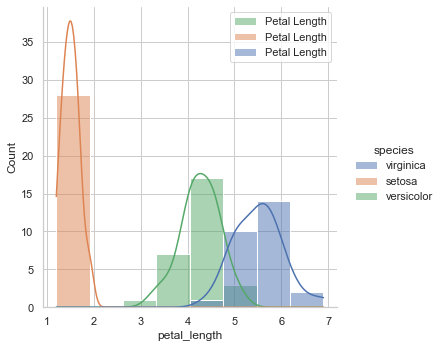

In [46]:
#using species as a columned hue shows us that the petal length has relation to what species it is when it comes to setosa, 
#versicolor and virginica seem fairly similar in petal length size
sns.displot(data=train, x="petal_length", hue="species", label="Petal Length", kde=True)

plt.legend() 
plt.show()

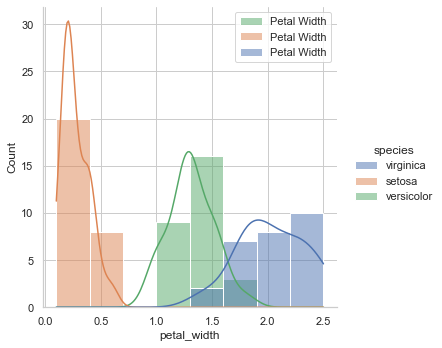

In [47]:
#the same can be said for petal width; majority of setosa iris species seem to be wider than the other two species
sns.displot(data=train, x="petal_width", hue="species", label="Petal Width", kde=True)
plt.legend() 
plt.show()

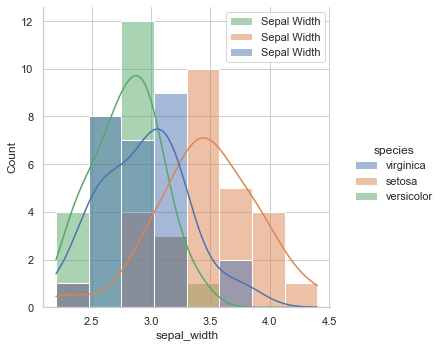

In [54]:
#sepal_width and species do not seem incredibly related
#there is a lot of similar sizes between species here
#however versicolor seems to have more sepal width that are larger than other iris'
sns.displot(data=train, x="sepal_width", hue="species", label="Sepal Width", kde=True)
plt.legend() 
plt.show()

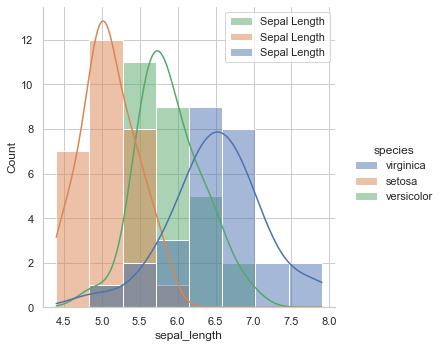

In [56]:
#sepal_length doesn't seem to be very related to species except that the iris' with the longer sepals tend to be setosa species
sns.displot(data=train, x="sepal_length", hue="species", label="Sepal Length", kde=True)
plt.legend() 
plt.show()

<AxesSubplot:xlabel='petal_width', ylabel='species'>

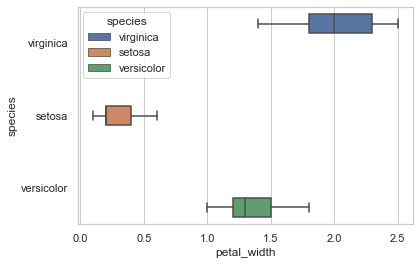

In [52]:
#this further shows that petal_width is related to the species of iris
import seaborn as sns
sns.boxplot(data=train, x="petal_width", y='species', orient="h", hue="species")

<AxesSubplot:xlabel='petal_length', ylabel='species'>

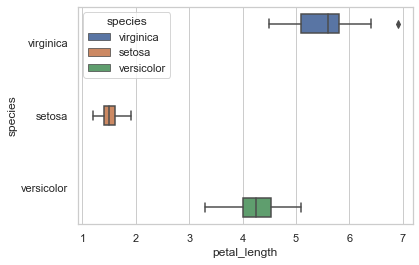

In [53]:
#this further shows that petal_length is related to the species of iris
import seaborn as sns
sns.boxplot(data=train, x="petal_length", y='species', orient="h", hue="species")